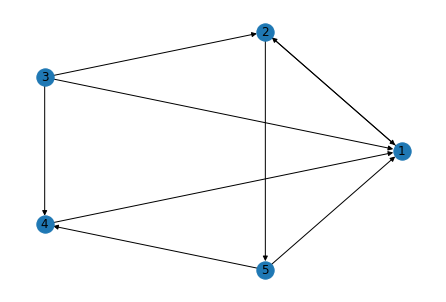

In [8]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
myWeb = nx.DiGraph()
myPages = range (1,5)
connections = [(1,2),(3,2),(3,4),(2,1),(3,1),(4,1),(5,1),(5,4),(2,5)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows= True, with_labels = True)
plt.show()


In [9]:
def createPageRank (aGraph) :
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis = 1)))
    prob_outwards = np.array(
        [1.0/ count
        if count > 0 else 0.0 for count in outwards])
    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set)/ float(nodes_set)
    if np.min(np.sum(G,axis=0)) < 1.0:
        print('WARN : G is substochastic')
    return G,p

In [10]:
G,p = createPageRank(myWeb)
print(G)

[[0.         0.5        0.33333333 1.         0.5       ]
 [1.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.5        0.         0.         0.        ]]
